In [1]:
import json
import nltk

with open("gists/minidogs.jsonl", "r") as inf:
    lns = [json.loads(i) for i in inf]

In [2]:
ROOT = 'ROOT'
def getNodes(parent, out):
    for node in parent:
        if type(node) is nltk.Tree:
            if node.label() == ROOT:
                print("======== Sentence =========")
                print("Sentence:", " ".join(node.leaves()))
            else:
                #print("Label:", node.label())
                #print("Leaves:", node.leaves())
                if len(node.leaves()) > 1:
                    out.append((node.label(), " ".join(node.leaves())))

            getNodes(node, out)
        else:
            pass

In [3]:
from environments.envs import ENVIRONMENTS
import argparse
import kenlm
import json

from klm.query import LM
from klm.query import get_unigram_probs

env = ENVIRONMENTS["DEV"]
LOC = env['klm_model']
UG_MODEL = env["ug_model"]

lm = LM(loc=LOC)
up = get_unigram_probs(UG_MODEL)
from klm.query import slor

In [4]:
from nltk.tree import *
from collections import defaultdict

label2slor = defaultdict(list)

for l in lns:
    out = list()
    tree2 = Tree.fromstring(l["parse"])
    getNodes(tree2, out)

    for o in out:
        label, str_ = o
        label2slor[label].append(slor(str_,lm, up))
        
import numpy as np

l2nlor = [(l, np.mean(label2slor[l])) for l in label2slor]
l2nlor.sort(key=lambda x:x[1], reverse=True)

l2nlor[0:10]

[('WHPP', 1.3954029079386394),
 ('QP', 1.163865520143636),
 ('SQ', 1.040755661819492),
 ('SINV', 0.9666974629882816),
 ('SBARQ', 0.9209395713480304),
 ('S', 0.9084331019542318),
 ('SBAR', 0.8160070705824893),
 ('UCP', 0.7164202955055198),
 ('WHNP', 0.7028571381694335),
 ('FRAG', 0.530781427732303)]

In [5]:
print(lns[22]["parse"])

(ROOT
  (S
    (S
      (NP (DT A) (NN mastiff))
      (VP (VBG eating)
        (NP
          (NP (CD one))
          (PP (IN of)
            (NP
              (NP (DT those) (JJ little) (NNS cloves))
              (SBAR
                (WHNP (WDT that))
                (S
                  (VP (VBP are)
                    (PP (IN like)
                      (PP (IN in)
                        (NP (DT the) (JJ middle))))))))))))
    (NP (PRP I))
    (VP (MD would) (RB n't)
      (VP (VB worry)
        (ADVP (RB about))))
    (. .)))


In [7]:


for node in tree2:
    if type(node) is nltk.Tree:
        if node.label() == ROOT:
            print("======== Sentence =========")
            print("Sentence:", " ".join(node.leaves()))
        else:
            #print("Label:", node.label())
            #print("Leaves:", node.leaves())
            if len(node.leaves()) > 1:
                out.append((node.label(), " ".join(node.leaves())))

        getNodes(node, out)
        
        
dir(node)

['__add__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_frozen_class',
 '_get_node',
 '_label',
 '_parse_error',
 '_pformat_flat',
 '_repr_png_',
 '_set_node',
 'append',
 'chomsky_normal_form',
 'clear',
 'collapse_unary',
 'convert',
 'copy',
 'count',
 'draw',
 'extend',
 'flatten',
 'freeze',
 'fromstring',
 'height',
 'index',
 'insert',
 'label',
 'leaf_treeposition',
 'leaves',
 'node',
 'pformat',
 'pformat_latex_qtree',
 'pop',
 'pos',
 'ppr

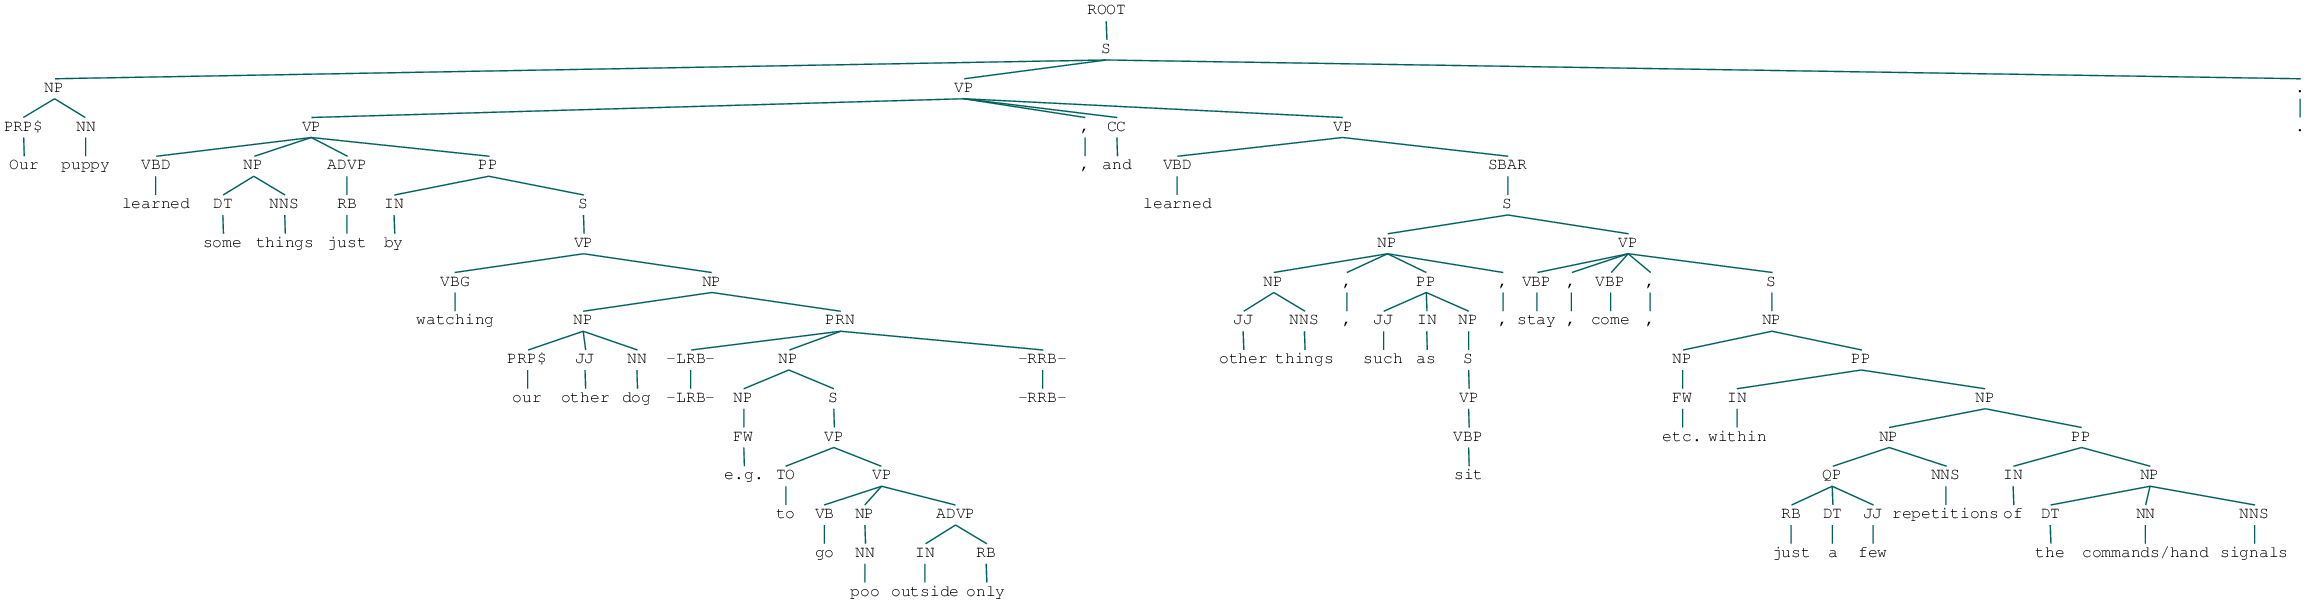

In [16]:
tree2 = Tree.fromstring(lns[12]["parse"])
tree2